# <center><b> Projet : Détection de langues <b><center>

Auteurs : ABOKY Rimey, TOKANNOU Charen Kéhat

## <b>Première étape :</b> Création et exploration d'un ensemble de données

<b>Création d'un ensemble de données</b>

En utilisant les outils vus en cours, nous collecterons des textes dans au moins 3 langues différentes.

<b>Exploration des données</b>

Une première hypothèse que l'on peut formuler est la suivante:

Hypothèse: La distribution des caractères varie d'une langue à l'autre.

Si cette hypothèse se vérifie on pourra s'en servir pour faire de la détection de langues. 

Nous ferons donc de l'exploration de données pour tester cette hypothèse.

### Création d'un ensemble de données

Nous avons choisi de travailler sur l'italien, l'anglais et le français. Ce choix est motivé par le fait que les alphabets de ces trois langues sont basés sur des variations très proches de l'alphabet latin. Pour chacune des trois langues, nous avons choisi de collecter le texte d'articles publiés sur Wikipédia. Ainsi,  
- pour l'italien, nous travaillerons sur un article qui raconte la vie de Benito Mussolini  
- pour l'anglais, nous travaillerons sur un article qui relate la vie de John F. Kennedy  
- pour le français, nous travaillerons sur l'article qui retrace la vie du Général Charles de Gaulle.

In [164]:
# URL des pages à scraper
URL_it = "https://it.wikipedia.org/wiki/Benito_Mussolini"           # Italien
URL_en = "https://en.wikipedia.org/wiki/John_F._Kennedy"            # Anglais
URL_fr = "https://fr.wikipedia.org/wiki/Charles_de_Gaulle"          # Français

In [165]:
import requests                                                     # Librairie permettant d'utiliser le protocole HTTP
from bs4 import BeautifulSoup                                       # Librairie permettant de collecter les données à partir de pages web

In [166]:
def get_text(url: str, taille: int):
    """
    Permet d'obtenir des paragraphes du texte principal d'une page wikipédia.

    Prend en arguments : 
    url (str): Le lien vers la page à scraper pour obtenir le texte.
    taille (int): le nombre de paragraphes à collecter.

    Retourne 
    Une liste de paragraphes.
    """
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find(id="mw-content-text")
    paragrs = []
    for par in results.find_all("p")[0:taille]:
        paragrs.append(par.text)
    return paragrs

In [167]:
# Collecte des textes dans les différentes langues
paragrs_it = get_text(URL_it, 14)                                   # Italien
print(paragrs_it[0])

paragrs_en = get_text(URL_en, 10)                                   # Anglais
print(paragrs_en[1])

paragrs_fr = get_text(URL_fr, 14)                                   # Français
print(paragrs_fr[3])

Benito Amilcare Andrea Mussolini (Dovia di Predappio, 29 luglio 1883 – Giulino di Mezzegra, 28 aprile 1945) è stato un politico, militare e giornalista italiano.

John Fitzgerald Kennedy (May 29, 1917 – November 22, 1963), often referred to by his initials JFK, was an American politician who served as the 35th president of the United States from 1961 until 1963. He was the youngest person to assume the presidency by election and the youngest president at the end of his tenure.[2] Kennedy served at the height of the Cold War, and the majority of his foreign policy concerned communist states such as the Soviet Union and Cuba. A Democrat, Kennedy represented Massachusetts in both houses of the U.S. Congress prior to his presidency.

Charles de Gaulle (/ʃaʁl də ɡol/[n 2] Écouter), communément appelé le général de Gaulle ou parfois simplement le Général, né le 22 novembre 1890 à Lille (Nord) et mort le 9 novembre 1970 à Colombey-les-Deux-Églises (Haute-Marne), est un militaire, résistant, h

### Nettoyage des données

Avant de procéder à l'exploration des données, il est nécessaire de procéder au nettoyage. En effet, pour le moment, nous avons juste collecté du texte sur des pages Wikipédia en différentes langues. En observant le texte collecté, nous remarquons qu'il contient des dates, des balises et des caractères spéciaux.

In [168]:
import re                                                           # Librairie regex permettant de manipuler les expressions régulières dans du texte

In [169]:
def set_forme(paragr):
    """
    Permet de mettre en forme le texte collecté pour l'analyse.

    Prend en arguments : 
    paragr: Une liste ou une chaine de caractères

    Retourne 
    Une liste de tous les caractères alphabétiques contenus dans l'entrée.
    """
    caract_1 = []
    for i in paragr:
        caract_1.append(re.findall(r"\w", i))
    
    caract_2 = []
    for i in caract_1:
        for j in i:
            caract_2.append(re.findall(r"\D", j))

    caract_3 = []
    for i in caract_2:
        for j in i:
            caract_3.append(j.lower())

    return caract_3

In [170]:
# Liste des caractères alphabétiques présents dans les textes sélectionnés.
lst_caract_it = set_forme(paragrs_it)                               #Italien
print(lst_caract_it[0: 44])

lst_caract_en = set_forme(paragrs_en)                               #Anglais
print(lst_caract_en[0: 44])

lst_caract_fr = set_forme(paragrs_fr)                               # Français
print(lst_caract_fr[0: 44])

['b', 'e', 'n', 'i', 't', 'o', 'a', 'm', 'i', 'l', 'c', 'a', 'r', 'e', 'a', 'n', 'd', 'r', 'e', 'a', 'm', 'u', 's', 's', 'o', 'l', 'i', 'n', 'i', 'd', 'o', 'v', 'i', 'a', 'd', 'i', 'p', 'r', 'e', 'd', 'a', 'p', 'p', 'i']
['j', 'o', 'h', 'n', 'f', 'i', 't', 'z', 'g', 'e', 'r', 'a', 'l', 'd', 'k', 'e', 'n', 'n', 'e', 'd', 'y', 'm', 'a', 'y', 'n', 'o', 'v', 'e', 'm', 'b', 'e', 'r', 'o', 'f', 't', 'e', 'n', 'r', 'e', 'f', 'e', 'r', 'r', 'e']
['p', 'o', 'u', 'r', 'l', 'e', 's', 'a', 'r', 't', 'i', 'c', 'l', 'e', 's', 'h', 'o', 'm', 'o', 'n', 'y', 'm', 'e', 's', 'v', 'o', 'i', 'r', 'c', 'h', 'a', 'r', 'l', 'e', 's', 'd', 'e', 'g', 'a', 'u', 'l', 'l', 'e', 'h']


Afin de vérifier l'hypothèse selon laquelle la distribution des caractères varie d'une langue à une autre, nous identifierons d'abord les différents caractères utilisés dans chaque langue et le nombre d'occurences de chaque caractère. 

In [171]:
def get_count_caract(dt_lake: list):
    """
    Permet de compter le nombre d'occurence de chaque élément d'une liste.

    Prend en arguments : 
    dt_lake: Une liste de caractères (avec répétitions).

    Retourne 
    Un dictionnaire avec en clé les éléments distincts de la liste (ordnnés du plus au moins fréquent) et en valeurs leurs nombres respectifs d'occurrence.
    """
    pre_compte = dict()
    compte = dict()
    for caractere in dt_lake:
        if caractere not in compte.keys():
            pre_compte[caractere] = dt_lake.count(caractere)
    for i, j in sorted(pre_compte.items(), key=lambda x: x[1], reverse=True):
        compte[i] = j
    return compte

In [172]:
# Ensemble de caractères présents dans chaque texte avec leurs nombres d'occurence.
dict_it = get_count_caract(lst_caract_it)                           # Italien
print(f"Italien: \n", dict_it)

dict_en = get_count_caract(lst_caract_en)                           # Anglais
print(f"Anglais: \n", dict_en)

dict_fr = get_count_caract(lst_caract_fr)                           # Français
print(f"Français: \n", dict_fr)

Italien: 
 {'i': 775, 'a': 761, 'e': 705, 'o': 593, 'l': 491, 'n': 484, 't': 427, 'r': 411, 's': 359, 'd': 272, 'c': 254, 'u': 188, 'p': 179, 'm': 173, 'g': 113, 'v': 106, 'f': 79, 'z': 62, 'b': 58, 'ò': 26, 'q': 20, 'h': 19, 'à': 8, 'ì': 7, 'è': 4, 'j': 1, 'á': 1, 'x': 1, 'ù': 1}
Anglais: 
 {'e': 775, 't': 523, 'a': 502, 'n': 497, 's': 457, 'o': 455, 'i': 440, 'r': 400, 'h': 329, 'd': 283, 'l': 249, 'c': 195, 'u': 146, 'm': 138, 'f': 134, 'p': 123, 'y': 113, 'b': 112, 'w': 97, 'g': 90, 'k': 63, 'v': 58, 'j': 32, 'z': 13, 'x': 9, 'q': 2, 'é': 1}
Français: 
 {'e': 969, 'i': 583, 'a': 579, 'n': 532, 'l': 500, 'r': 497, 's': 461, 't': 458, 'u': 359, 'o': 330, 'd': 292, 'p': 208, 'c': 196, 'm': 185, 'é': 180, 'f': 103, 'g': 102, 'v': 66, 'h': 57, 'b': 52, 'q': 50, 'à': 38, 'è': 28, 'j': 23, 'y': 20, 'x': 16, 'ç': 14, 'ê': 7, 'î': 5, 'ô': 4, 'ù': 3, 'w': 2, 'â': 2, 'ʃ': 1, 'ʁ': 1, 'ə': 1, 'ɡ': 1, 'z': 1, 'k': 1, 'ë': 1}


In [173]:
def get_freq_caract(dt_lake: list, caract=None):
    """
    Permet d'obtenir la fréquence d'occurence de chaque élément d'une liste.

    Prend en arguments : 
    dt_lake: Une liste de caractères (avec répétitions).
    caract (list): Une liste des elements dont on veut la fréquence. Si caract est None,
    obtenir la fréquence pour tous les caractères.

    Retourne 
    Un dictionnaire avec en clé les éléments de la liste (ordnnés du plus au moins fréquent) et en valeurs leurs fréquences respectives d'occurrence.
    """
    if caract is None:
        freq_dict = dict()
    else:
        freq_dict = dict()
        for k in caract:
            freq_dict[k] = 0
    dico = get_count_caract(dt_lake)
    for i, j in dico.items():
        freq_dict[i] = (j*100//len(dt_lake))
    return freq_dict

In [174]:
# Ensemble de caractères présents dans chaque texte avec leurs fréquences d'apparition.
fq_dict_it = get_freq_caract(lst_caract_it)                         # Italien
print(f"Italien: \n", fq_dict_it)

fq_dict_en = get_freq_caract(lst_caract_en)                         # Anglais
print(f"Anglais: \n", fq_dict_en)

fq_dict_fr = get_freq_caract(lst_caract_fr)                         # Français
print(f"Français: \n", fq_dict_fr)

Italien: 
 {'i': 11, 'a': 11, 'e': 10, 'o': 9, 'l': 7, 'n': 7, 't': 6, 'r': 6, 's': 5, 'd': 4, 'c': 3, 'u': 2, 'p': 2, 'm': 2, 'g': 1, 'v': 1, 'f': 1, 'z': 0, 'b': 0, 'ò': 0, 'q': 0, 'h': 0, 'à': 0, 'ì': 0, 'è': 0, 'j': 0, 'á': 0, 'x': 0, 'ù': 0}
Anglais: 
 {'e': 12, 't': 8, 'a': 8, 'n': 7, 's': 7, 'o': 7, 'i': 7, 'r': 6, 'h': 5, 'd': 4, 'l': 3, 'c': 3, 'u': 2, 'm': 2, 'f': 2, 'p': 1, 'y': 1, 'b': 1, 'w': 1, 'g': 1, 'k': 1, 'v': 0, 'j': 0, 'z': 0, 'x': 0, 'q': 0, 'é': 0}
Français: 
 {'e': 13, 'i': 8, 'a': 8, 'n': 7, 'l': 7, 'r': 7, 's': 6, 't': 6, 'u': 5, 'o': 4, 'd': 4, 'p': 3, 'c': 2, 'm': 2, 'é': 2, 'f': 1, 'g': 1, 'v': 0, 'h': 0, 'b': 0, 'q': 0, 'à': 0, 'è': 0, 'j': 0, 'y': 0, 'x': 0, 'ç': 0, 'ê': 0, 'î': 0, 'ô': 0, 'ù': 0, 'w': 0, 'â': 0, 'ʃ': 0, 'ʁ': 0, 'ə': 0, 'ɡ': 0, 'z': 0, 'k': 0, 'ë': 0}


### Exploration des données
Nous remarquons déjà certaines différences entre les langues en observant les fréquences d'apparition des caractères. Par exemple, en italien le "i" est le caractère le pus fréquent suivi de près par la lettre "a". En anglais par contre les lettres "i" et "a" sont respectivement le septième et le troisième caractère le plus fréquent. Représentonns graphiquement les distributions afin de mieux observer l'importance des différences entre les différentes langues.

Avant cela agrégeons les fréquences d'occurrence des caractères dans chaque langue dans un dataframe afin de faciliter la manipulation des données

In [175]:
import pandas as pd                                                 # Librairie permettant la manipulation et l'analyse des données
import matplotlib.pyplot as plt                                     # Librairie matplotlib pour la data visualization

In [176]:
# Dataframe des fréquences d'apparition de chaque caractère par langue.
dico_list = [fq_dict_it, fq_dict_en, fq_dict_fr]
df=pd.DataFrame(dico_list, index = ["Italien", "Anglais", "Francais"])
print(df)

           i   a   e  o  l  n  t  r  s  d  ...    ç    ê    î    ô    â    ʃ  \
Italien   11  11  10  9  7  7  6  6  5  4  ...  NaN  NaN  NaN  NaN  NaN  NaN   
Anglais    7   8  12  7  3  7  8  6  7  4  ...  NaN  NaN  NaN  NaN  NaN  NaN   
Francais   8   8  13  4  7  7  6  7  6  4  ...  0.0  0.0  0.0  0.0  0.0  0.0   

            ʁ    ə    ɡ    ë  
Italien   NaN  NaN  NaN  NaN  
Anglais   NaN  NaN  NaN  NaN  
Francais  0.0  0.0  0.0  0.0  

[3 rows x 43 columns]


In [177]:
# Réduction du dataframe aux caractères qui apparaissent au moins une fois dans chaque texte.
caract_rares = [col for col in df.columns if df[col].isnull().any()]
df.drop(caract_rares, axis=1, inplace=True)
print(df)

           i   a   e  o  l  n  t  r  s  d  ...  m  g  v  f  z  b  q  h  j  x
Italien   11  11  10  9  7  7  6  6  5  4  ...  2  1  1  1  0  0  0  0  0  0
Anglais    7   8  12  7  3  7  8  6  7  4  ...  2  1  0  2  0  1  0  5  0  0
Francais   8   8  13  4  7  7  6  7  6  4  ...  2  1  0  1  0  0  0  0  0  0

[3 rows x 23 columns]


In [178]:
# Liste des caractères présents dans les trois langues
caract = df.columns.tolist()
caract.sort()
print(caract)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'z']


In [179]:
# Réorganisation des colonnes du dataframe dans l'ordre alphabétique
df = df[caract]
print(df)

           a  b  c  d   e  f  g  h   i  j  ...  o  p  q  r  s  t  u  v  x  z
Italien   11  0  3  4  10  1  1  0  11  0  ...  9  2  0  6  5  6  2  1  0  0
Anglais    8  1  3  4  12  2  1  5   7  0  ...  7  1  0  6  7  8  2  0  0  0
Francais   8  0  2  4  13  1  1  0   8  0  ...  4  3  0  7  6  6  5  0  0  0

[3 rows x 23 columns]


<BarContainer object of 23 artists>

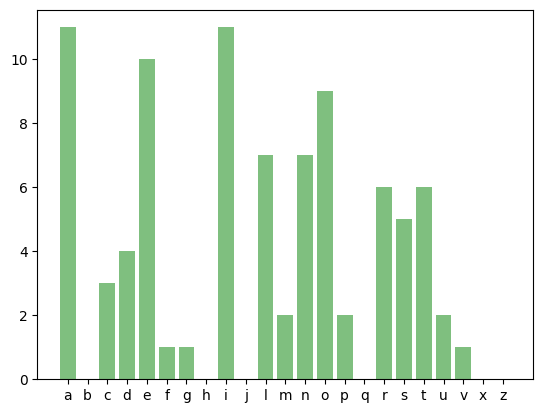

In [180]:
# Représentation graphique de la fréquence d'apparition des caractères en Italien
plt.bar(caract, df.loc["Italien"], alpha=0.5, color='g')

<BarContainer object of 23 artists>

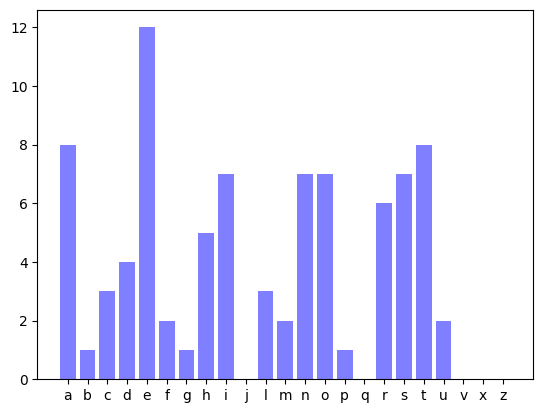

In [181]:
# Représentation graphique de la fréquence d'apparition des caractères en Anglais
plt.bar(caract, df.loc["Anglais"], alpha=0.5, color='b')

<BarContainer object of 23 artists>

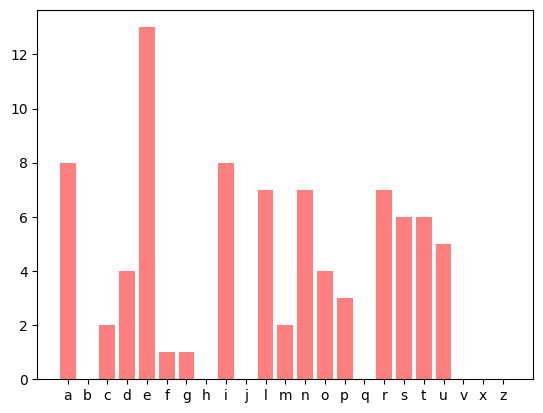

In [182]:
# Représentation graphique de la fréquence d'apparition des caractères en Français
plt.bar(caract, df.loc["Francais"], alpha=0.5, color='r')

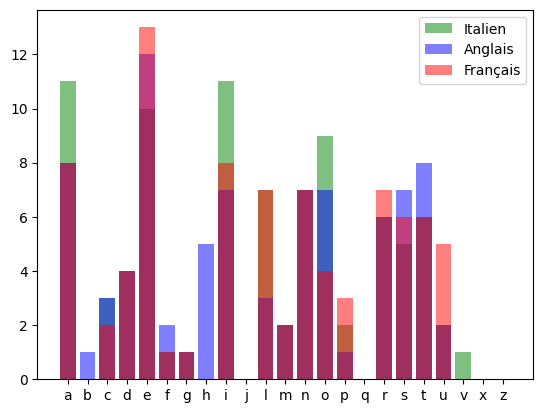

In [183]:
# Superposition des trois graphiques précédents
plt.bar(caract, df.loc["Italien"], alpha=0.5, color='g')
plt.bar(caract, df.loc["Anglais"], alpha=0.5, color='b')
plt.bar(caract, df.loc["Francais"], alpha=0.5, color='r')
plt.legend(["Italien", "Anglais", "Français"])
plt.show()

Nous remarquons clairement en superposant les graphiques que les propotions de chaque caractère dans les langues sont différentes.

Cela permet de confirmer l'hypothèse selon laquelle la distribtion des caractères varie d'une ditribution à une autre.

## <b>Deuxième étape :</b> Modélisation sous la forme d'un problème de classification :

<b>Choix de la représentation des données</b>

Nous réaliserons une analyse discriminante afin de choisir d caractères parmi les plus fréquents et les plus discriminants pour représenter les fragments de textes par des vecteurs dans Rd.

<b>Constitution d'un ensemble d'entraînement</b>

L'idée est de découper les textes récoltés dans l'étape précédente en fragments de textes qui seront les entrées d'un classifieur. Pour cela, nous devrons :

- Choisir une longueur minimum lmin pour la taille d'un fragment de texte.

- Etant donné un texte de N caractères dans la langue y, le découper en n=⌊N/lmin⌋ (cad la partie entière de la fraction) fragments d'exemples de textes dans la langue yi: {(F1,yi),…,(Fn,yi)}.

- Représenter chaque fragment Fj par le vecteur xj des fréquences des caractères choisis dans l'étape précédente. Répéter cette opération pour chacune des langues pour obtenir votre ensemble d'entraînement.


### Choix de la représentation des données

Afin de choisir les caractères qui permettrons de représenter les données, nous nous baserons sur deux critères :
 - il faut que le caractère soit suffisament fréquent dans les trois langues
 - il faut que le caractère ait des fréquences d'apparition significativement différentes d'une langue à une autre
Nous allons sélectionner les d caractères en se basant sur ces deux critères.

<b>Premier critère :</b> il faut que le caractère soit suffisament fréquent dans les trois langues
Chaque lettre a trois fréquences d'apparition : une par langue. Nous calculons la moyenne des fréquences d'apparition. Les caractères les plus fréquents auront une moyenne de fréquence d'apparition plus grande. Nous sélectionnerons uniquement les caractères ayant une moyenne de fréquence d'apparition supérieure à la moyenne des moyennes.

In [184]:
# Pour chaque caractère nous calculons la moyenne des fréquences k et le plus grand écart de fréquences d
dtframe = dict()
for i in df:
    k = df[i].mean()
    a = abs(df[i][0] - df[i][1])
    b = abs(df[i][0] - df[i][2])
    c = abs(df[i][1] - df[i][2])
    d = max(a, b, c)
    dtframe[i] = (k, d)
print(dtframe)

{'a': (9.0, 3), 'b': (0.3333333333333333, 1), 'c': (2.6666666666666665, 1), 'd': (4.0, 0), 'e': (11.666666666666666, 3), 'f': (1.3333333333333333, 1), 'g': (1.0, 0), 'h': (1.6666666666666667, 5), 'i': (8.666666666666666, 4), 'j': (0.0, 0), 'l': (5.666666666666667, 4), 'm': (2.0, 0), 'n': (7.0, 0), 'o': (6.666666666666667, 5), 'p': (2.0, 2), 'q': (0.0, 0), 'r': (6.333333333333333, 1), 's': (6.0, 2), 't': (6.666666666666667, 2), 'u': (3.0, 3), 'v': (0.3333333333333333, 1), 'x': (0.0, 0), 'z': (0.0, 0)}


In [185]:
# Calcul de la moyenne des moyennes
moyennes = list()
for i in dtframe:
    moyennes.append(dtframe[i][0])
seuil = sum(moyennes)/len(moyennes)
print(seuil)

3.739130434782608


In [186]:
# Suppression des caractères dont la moyenne est en dessous du seuil
dicoo = dict()
for i in dtframe:
    if dtframe[i][0] > seuil:
        dicoo[i] = dtframe[i][1]
print(dicoo)

{'a': 3, 'd': 0, 'e': 3, 'i': 4, 'l': 4, 'n': 0, 'o': 5, 'r': 1, 's': 2, 't': 2}


<b>Second critère :</b> il faut que le caractère ait des fréquences d'apparition significativement différentes d'une langue à une autre
L'écart maximum de chaque caractère est calculé en prenant le maximum des valeurs absolues des écarts entre les fréquences d'ocurrence en italien et en français, en italien et en anglais, et en anglais et en francais. Nous ne prendrons que les lettres dont l'écart maximum est au dessus de 2. Le choix du nombre 2 est fait sans aucune raison particulière.

In [187]:
# Suppression des caractères dont l'écart maximal est en dessous de 2
d = list()
for i in dicoo:
    if dicoo[i] >= 2:
        d.append(i)
print(d, len(d))

['a', 'e', 'i', 'l', 'o', 's', 't'] 7


Nous retiendrons donc pour notre analyse les 7 caractères suivant : 'a', 'e', 'i', 'l', 'o', 's', 't'

### Construction d'un ensemble d'entrainement

Nous découperons chacun des trois textes en fragment de 15 caractères. Le nombre de caractères ne devrait être ni trop petit ni trop grand nous avons choisi le nombre 15 sans aucune autre raison particulière. 

In [188]:
from sklearn.model_selection import train_test_split                # Module pour séparer une base de donnée en base de données d'entrainement et base de données de test

In [189]:
def sliceur(iterable, taille: int):
    """
    Permet de découper un itérable en fragment d'une taille donnée.

    Prend en arguments : 
    iterable: Une liste de caractères "un à un isolés".
    taille (int): Un entier qui donne la taille des fragments que l'on souhaite obtenir.

    Retourne 
    Une liste de fragments de liste. En d'autres termes une liste de listes.
    """
    iteration = []
    for i in range(0,len(iterable),taille):
        iteration.append(iterable[i:i+taille])
    iteration.pop(-1)
    return iteration

In [190]:
# Création de fragment de taille 15
lst_frag_it = sliceur(lst_caract_it, 15)                            # Italien
print("Nombre de fragments italien : ", len(lst_frag_it))

lst_frag_en = sliceur(lst_caract_en, 15)                            # Anglais
print("Nombre de fragments anglais : ", len(lst_frag_en))

lst_frag_fr = sliceur(lst_caract_fr, 15)                            # Français
print("Nombre de fragments français : ", len(lst_frag_fr))

Nombre de fragments italien :  438
Nombre de fragments anglais :  415
Nombre de fragments français :  461


In [191]:
def get_dict_frag(lst_frag):
    """
    Permet de représenter chaque fragment par les fréquences d'apparition des caractères discriminants dans ce fragment

    Prend en arguments : 
    lst_frag : la liste des fragments.

    Retourne 
    Un dictionnaire avec en clé l'identifiant du fragment et en valeur un tuple des fréquences d'apparition des caractères discriminants
    """
    dict_frag = dict()
    for i in range(len(lst_frag)):
        k = lst_frag[i]
        j = get_freq_caract(k, caract=d)
        dict_frag[f"Fragment {i+1}"] = tuple(j[l] for l in d)
    return dict_frag

In [192]:
# Création de dictionnaires contenant les vecteurs représentants chaque caractère
dict_frag_it = get_dict_frag(lst_frag_it)                           # Italien
print(f"\nItalien : \n", dict(list(dict_frag_it.items())[0: 10]))

dict_frag_en = get_dict_frag(lst_frag_en)                           # Anglais
print(f"\nAnglais : \n", dict(list(dict_frag_en.items())[0: 10]))

dict_frag_fr = get_dict_frag(lst_frag_fr)                           # Français
print(f"\nFrançais : \n", dict(list(dict_frag_fr.items())[0: 10]))


Italien : 
 {'Fragment 1': (20, 13, 13, 6, 6, 0, 6), 'Fragment 2': (6, 6, 13, 6, 6, 13, 0), 'Fragment 3': (13, 6, 20, 0, 13, 0, 0), 'Fragment 4': (0, 0, 26, 20, 13, 0, 0), 'Fragment 5': (13, 20, 6, 6, 0, 0, 0), 'Fragment 6': (6, 0, 13, 6, 20, 6, 20), 'Fragment 7': (13, 13, 20, 6, 6, 0, 6), 'Fragment 8': (20, 0, 20, 13, 13, 6, 13), 'Fragment 9': (13, 13, 6, 6, 6, 6, 6), 'Fragment 10': (0, 20, 6, 0, 6, 13, 6)}

Anglais : 
 {'Fragment 1': (6, 6, 6, 6, 6, 0, 6), 'Fragment 2': (6, 20, 0, 0, 6, 0, 0), 'Fragment 3': (0, 33, 0, 0, 6, 0, 6), 'Fragment 4': (6, 0, 26, 6, 6, 13, 13), 'Fragment 5': (26, 6, 6, 0, 0, 6, 0), 'Fragment 6': (6, 0, 20, 6, 13, 6, 6), 'Fragment 7': (6, 26, 0, 0, 0, 6, 13), 'Fragment 8': (0, 13, 13, 0, 6, 6, 20), 'Fragment 9': (6, 13, 0, 0, 6, 13, 20), 'Fragment 10': (6, 13, 6, 6, 6, 6, 6)}

Français : 
 {'Fragment 1': (6, 13, 6, 13, 6, 13, 6), 'Fragment 2': (0, 6, 6, 0, 20, 6, 0), 'Fragment 3': (13, 20, 0, 20, 6, 6, 0), 'Fragment 4': (6, 20, 6, 13, 6, 0, 6), 'Fragment 5':

In [193]:
# Dataframe des fréquences d'apparition de chaque caractère dans les fragments italiens
df_italien=pd.DataFrame(dict_frag_it, index = d)
df_italien.loc["Langue"] = ["IT"]*len(dict_frag_it)
df_italien = df_italien.transpose()

# Dataframe des fréquences d'apparition de chaque caractère dans les fragments anglais
df_anglais=pd.DataFrame(dict_frag_en, index = d)
df_anglais.loc["Langue"] = ["EN"]*len(dict_frag_en)
df_anglais = df_anglais.transpose()

# Dataframe des fréquences d'apparition de chaque caractère dans les fragments français
df_francais=pd.DataFrame(dict_frag_fr, index = d)
df_francais.loc["Langue"] = ["FR"]*len(dict_frag_fr)
df_francais = df_francais.transpose()

In [194]:
frames = (df_italien, df_anglais, df_francais)
df_final = pd.concat(frames)
df_final = df_final.reset_index(drop=True)
print(df_final)

       a   e   i   l   o   s   t Langue
0     20  13  13   6   6   0   6     IT
1      6   6  13   6   6  13   0     IT
2     13   6  20   0  13   0   0     IT
3      0   0  26  20  13   0   0     IT
4     13  20   6   6   0   0   0     IT
...   ..  ..  ..  ..  ..  ..  ..    ...
1309  13  20   6   0   0   6   0     FR
1310   6   6  13   6   0  20  13     FR
1311   0  20   6   6   6  13   0     FR
1312  13   6  13   0   0   6  20     FR
1313  20  13   0   6   0   6   0     FR

[1314 rows x 8 columns]


In [195]:
df_final.describe()

,a,e,i,l,o,s,t,Langue
count,1314,1314,1314,1314,1314,1314,1314,1314
unique,7,7,6,7,6,6,6,3
top,6,13,6,0,6,0,6,FR
freq,499,434,466,495,528,499,530,461


In [196]:
# Création du tableau des variables explicatives et de la variable à expliquer
y = df_final['Langue']
X = df_final.drop(['Langue'] , axis=1)
print(X.shape, y.shape)

(1314, 7) (1314,)


In [197]:
# Création des bases de données d'apprentissage et des bases de données de test
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=5)
print(" Taille de la base des X d'apprentissage :", X_tr.shape, "\n Taille de la base des X de test :", X_te.shape, "\n Taille de la base y d'apprentissage :", y_tr.shape, "\n Taille de la base y de test :", y_te.shape)

 Taille de la base des X d'apprentissage : (1051, 7) 
 Taille de la base des X de test : (263, 7) 
 Taille de la base y d'apprentissage : (1051,) 
 Taille de la base y de test : (263,)


## <b>Troisième étape :</b> Classification naive bayésienne :
Il s'agira ici d'entrainer un modèle de classification naif bayésien sur l'ensemble des données d'entrainement constitué à l'étape précédente.

In [198]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score                 # Module pour réaliser la validation croisée
import numpy as np

In [199]:
# Ajustement du modèle
GNB = GaussianNB()
GNB.fit(X_tr, y_tr)

GaussianNB()

In [200]:
# Évaluation de la performance du modèle (calcul des scores)
print("Score d'entrainement:", GNB.score(X_tr, y_tr))
print('Score de test:', GNB.score(X_te, y_te))
print('Score de la validation croisée:', np.mean(cross_val_score(GNB, X, y, cv=5)))

Score d'entrainement: 0.5214081826831589
Score de test: 0.5551330798479087
Score de la validation croisée: 0.5075929527181959


Nous remarquons que les scores de la classification naive bayésienne ne sont pas très bons. En effet, l'algorithme n'arrive à bien classer un fragment de texte qu'une fois sur deux. Il est possible que cela soit dû à un choix de représentation pas suffisement discriminante ou à une taille de fragment trop petite.

## <b>Quatrième étape :</b> Piste d'approfondissement :

### <b> Evolution 1 :</b> Changement de la représentation des données
Nous avons choisi de ne pas représenter les fragments avec les caractères rares. Pour cette piste d'amélioration nous étudierons l'éffet de l'utilisation de caractères rares (dans certaines langues seulement) pour la représentation des fragments. Nous conserverons cependant le critère d'écart entre les fréquences.

In [201]:
# Suppression des caractères dont la moyenne est en dessous du seuil
dicoo1 = dict()
for i in dtframe:
    if dtframe[i][0] > 1:
        dicoo1[i] = dtframe[i][1]
print(dicoo1)

{'a': 3, 'c': 1, 'd': 0, 'e': 3, 'f': 1, 'h': 5, 'i': 4, 'l': 4, 'm': 0, 'n': 0, 'o': 5, 'p': 2, 'r': 1, 's': 2, 't': 2, 'u': 3}


In [202]:
# Suppression des caractères dont l'écart maximal est en dessous de 2
d = list()
for i in dicoo1:
    if dicoo1[i] >= 2:
        d.append(i)
print(d, len(d))

['a', 'e', 'h', 'i', 'l', 'o', 'p', 's', 't', 'u'] 10


In [203]:
# Création de fragment de taille 15
lst_frag_it1 = sliceur(lst_caract_it, 15)                            # Italien
print("Nombre de fragments italien : ", len(lst_frag_it1))

lst_frag_en1 = sliceur(lst_caract_en, 15)                            # Anglais
print("Nombre de fragments anglais : ", len(lst_frag_en1))

lst_frag_fr1 = sliceur(lst_caract_fr, 15)                            # Français
print("Nombre de fragments français : ", len(lst_frag_fr1))

Nombre de fragments italien :  438
Nombre de fragments anglais :  415
Nombre de fragments français :  461


In [204]:
# Création de dictionnaires contenant les vecteurs représentants chaque caractère
dict_frag_it1 = get_dict_frag(lst_frag_it1)                           # Italien
print(f"\nItalien : \n", dict(list(dict_frag_it1.items())[0: 10]))

dict_frag_en1 = get_dict_frag(lst_frag_en1)                           # Anglais
print(f"\nAnglais : \n", dict(list(dict_frag_en1.items())[0: 10]))

dict_frag_fr1 = get_dict_frag(lst_frag_fr1)                           # Français
print(f"\nFrançais : \n", dict(list(dict_frag_fr1.items())[0: 10]))


Italien : 
 {'Fragment 1': (20, 13, 0, 13, 6, 6, 0, 0, 6, 0), 'Fragment 2': (6, 6, 0, 13, 6, 6, 0, 13, 0, 6), 'Fragment 3': (13, 6, 0, 20, 0, 13, 20, 0, 0, 0), 'Fragment 4': (0, 0, 0, 26, 20, 13, 0, 0, 0, 13), 'Fragment 5': (13, 20, 0, 6, 6, 0, 6, 0, 0, 0), 'Fragment 6': (6, 0, 0, 13, 6, 20, 6, 6, 20, 6), 'Fragment 7': (13, 13, 0, 20, 6, 6, 0, 0, 6, 0), 'Fragment 8': (20, 0, 0, 20, 13, 13, 0, 6, 13, 0), 'Fragment 9': (13, 13, 0, 6, 6, 6, 0, 6, 6, 0), 'Fragment 10': (0, 20, 0, 6, 0, 6, 6, 13, 6, 6)}

Anglais : 
 {'Fragment 1': (6, 6, 6, 6, 6, 6, 0, 0, 6, 0), 'Fragment 2': (6, 20, 0, 0, 0, 6, 0, 0, 0, 0), 'Fragment 3': (0, 33, 0, 0, 0, 6, 0, 0, 6, 0), 'Fragment 4': (6, 0, 6, 26, 6, 6, 0, 13, 13, 0), 'Fragment 5': (26, 6, 0, 6, 0, 0, 0, 6, 0, 0), 'Fragment 6': (6, 0, 6, 20, 6, 13, 6, 6, 6, 0), 'Fragment 7': (6, 26, 13, 0, 0, 0, 6, 6, 13, 0), 'Fragment 8': (0, 13, 6, 13, 0, 6, 0, 6, 20, 6), 'Fragment 9': (6, 13, 0, 0, 0, 6, 0, 13, 20, 6), 'Fragment 10': (6, 13, 13, 6, 6, 6, 0, 6, 6, 6)}



In [205]:
# Dataframe des fréquences d'apparition de chaque caractère dans les fragments italiens
df_italien1=pd.DataFrame(dict_frag_it1, index = d)
df_italien1.loc["Langue"] = ["IT"]*len(dict_frag_it1)
df_italien1 = df_italien1.transpose()

# Dataframe des fréquences d'apparition de chaque caractère dans les fragments anglais
df_anglais1=pd.DataFrame(dict_frag_en1, index = d)
df_anglais1.loc["Langue"] = ["EN"]*len(dict_frag_en1)
df_anglais1 = df_anglais1.transpose()

# Dataframe des fréquences d'apparition de chaque caractère dans les fragments français
df_francais1=pd.DataFrame(dict_frag_fr1, index = d)
df_francais1.loc["Langue"] = ["FR"]*len(dict_frag_fr1)
df_francais1 = df_francais1.transpose()

In [206]:
frames = (df_italien1, df_anglais1, df_francais1)
df_final1 = pd.concat(frames)
df_final1 = df_final1.reset_index(drop=True)
print(df_final1)

       a   e  h   i   l   o   p   s   t   u Langue
0     20  13  0  13   6   6   0   0   6   0     IT
1      6   6  0  13   6   6   0  13   0   6     IT
2     13   6  0  20   0  13  20   0   0   0     IT
3      0   0  0  26  20  13   0   0   0  13     IT
4     13  20  0   6   6   0   6   0   0   0     IT
...   ..  .. ..  ..  ..  ..  ..  ..  ..  ..    ...
1309  13  20  0   6   0   0   0   6   0   0     FR
1310   6   6  0  13   6   0   0  20  13   6     FR
1311   0  20  6   6   6   6   0  13   0   6     FR
1312  13   6  0  13   0   0   0   6  20   0     FR
1313  20  13  0   0   6   0   0   6   0  13     FR

[1314 rows x 11 columns]


In [207]:
# Création du tableau des variables explicatives et de la variable à expliquer
y1 = df_final1['Langue']
X1 = df_final1.drop(['Langue'] , axis=1)
print(X.shape, y.shape)

(1314, 7) (1314,)


In [208]:
# Création des bases de données d'apprentissage et des bases de données de test
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X1, y1, test_size=0.20, random_state=5)
print(" Taille de la base des X d'apprentissage :", X_tr1.shape, "\n Taille de la base des X de test :", X_te1.shape, "\n Taille de la base y d'apprentissage :", y_tr1.shape, "\n Taille de la base y de test :", y_te1.shape)

 Taille de la base des X d'apprentissage : (1051, 10) 
 Taille de la base des X de test : (263, 10) 
 Taille de la base y d'apprentissage : (1051,) 
 Taille de la base y de test : (263,)


In [209]:
# Ajustement du modèle
GNB1 = GaussianNB()
GNB1.fit(X_tr1, y_tr1)

GaussianNB()

In [210]:
# Évaluation de la performance du modèle (calcul des scores)
print("Score d'entrainement:", GNB.score(X_tr1, y_tr1))
print('Score de test:', GNB1.score(X_te1, y_te1))
print('Score de la validation croisée:', np.mean(cross_val_score(GNB1, X1, y1, cv=5)))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- h
- p
- u


La prédiction n'est pas possible car les caractères "h", "p" et "u" n'ont pas été vus durant la phase d'ajustement du modèle. Ce problème persiste même quand nous augmentons la taille des fragments à 200. Il n'est donc ni judicieux ni possible de prendre des caractères moins fréquents mais plus discriminants.

### <b> Evolution 2 :</b> : Changement de la taille des fragments

Nous avons choisi de représenter les données avec des fragments de taille 15. Peut-être qu'avec des fragments de tailles plus grandes, nous aurions de meilleurs résultats. Nous essayerons donc différentes tailles.

<b>Fragments de taille 30 <b>

In [211]:
# Création de fragment de taille 30
lst_frag_it = sliceur(lst_caract_it, 30)                            # Italien
#print("Nombre de fragments italien : ", len(lst_frag_it))

lst_frag_en = sliceur(lst_caract_en, 30)                            # Anglais
#print("Nombre de fragments anglais : ", len(lst_frag_en))

lst_frag_fr = sliceur(lst_caract_fr, 30)                            # Français

In [212]:
# Création de dictionnaires contenant les vecteurs représentants chaque caractère
dict_frag_it = get_dict_frag(lst_frag_it)                           # Italien
#print(f"\nItalien : \n", dict(list(dict_frag_it.items())[0: 10]))

dict_frag_en = get_dict_frag(lst_frag_en)                           # Anglais
#print(f"\nAnglais : \n", dict(list(dict_frag_en.items())[0: 10]))

dict_frag_fr = get_dict_frag(lst_frag_fr)                           # Français
#print(f"\nFrançais : \n", dict(list(dict_frag_fr.items())[0: 10]))

In [213]:
# Dataframe des fréquences d'apparition de chaque caractère dans les fragments italiens
df_italien=pd.DataFrame(dict_frag_it, index = d)
df_italien.loc["Langue"] = ["IT"]*len(dict_frag_it)
df_italien = df_italien.transpose()


# Dataframe des fréquences d'apparition de chaque caractère dans les fragments anglais
df_anglais=pd.DataFrame(dict_frag_en, index = d)
df_anglais.loc["Langue"] = ["EN"]*len(dict_frag_en)
df_anglais = df_anglais.transpose()

# Dataframe des fréquences d'apparition de chaque caractère dans les fragments français
df_francais=pd.DataFrame(dict_frag_fr, index = d)
df_francais.loc["Langue"] = ["FR"]*len(dict_frag_fr)
df_francais = df_francais.transpose()

In [214]:
frames = (df_italien, df_anglais, df_francais)
df_final = pd.concat(frames)
df_final = df_final.reset_index(drop=True)
#print(df_final)

In [215]:
# Création du tableau des variables explicatives et de la variable à expliquer
y = df_final['Langue']
X = df_final.drop(['Langue'] , axis=1)
print(X.shape, y.shape)

(656, 10) (656,)


In [216]:
# Création des bases de données d'apprentissage et des bases de données de test
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=5)
print(" Taille de la base des X d'apprentissage :", X_tr.shape, "\n Taille de la base des X de test :", X_te.shape, "\n Taille de la base y d'apprentissage :", y_tr.shape, "\n Taille de la base y de test :", y_te.shape)

 Taille de la base des X d'apprentissage : (524, 10) 
 Taille de la base des X de test : (132, 10) 
 Taille de la base y d'apprentissage : (524,) 
 Taille de la base y de test : (132,)


In [217]:
GNB = GaussianNB()
GNB.fit(X_tr, y_tr)

GaussianNB()

In [218]:
# Évaluation de la performance du modèle (calcul des scores)
print("Score d'entrainement:", GNB.score(X_tr, y_tr))
print('Score de test:', GNB.score(X_te, y_te))
print('Score de la validation croisée:', np.mean(cross_val_score(GNB, X, y, cv=5)))

Score d'entrainement: 0.7709923664122137
Score de test: 0.7878787878787878
Score de la validation croisée: 0.7407818644459866


Nous constatons que nous avons de meilleurs scores en améliorant la taille des fragments. Nous pourrions essayer d'augmenter encore la taille des fragments.

<b>Fragments de taille 50<b>

In [219]:
# Création de fragment de taille 15
lst_frag_it = sliceur(lst_caract_it, 50)                            # Italien
#print("Nombre de fragments italien : ", len(lst_frag_it))

lst_frag_en = sliceur(lst_caract_en, 50)                            # Anglais
#print("Nombre de fragments anglais : ", len(lst_frag_en))

lst_frag_fr = sliceur(lst_caract_fr, 50)                            # Français


In [220]:
# Création de dictionnaires contenant les vecteurs représentants chaque caractère
dict_frag_it = get_dict_frag(lst_frag_it)                           # Italien
#print(f"\nItalien : \n", dict(list(dict_frag_it.items())[0: 10]))

dict_frag_en = get_dict_frag(lst_frag_en)                           # Anglais
#print(f"\nAnglais : \n", dict(list(dict_frag_en.items())[0: 10]))

dict_frag_fr = get_dict_frag(lst_frag_fr)                           # Français
#print(f"\nFrançais : \n", dict(list(dict_frag_fr.items())[0: 10]))

In [221]:
# Dataframe des fréquences d'apparition de chaque caractère dans les fragments italiens
df_italien=pd.DataFrame(dict_frag_it, index = d)
df_italien.loc["Langue"] = ["IT"]*len(dict_frag_it)
df_italien = df_italien.transpose()


# Dataframe des fréquences d'apparition de chaque caractère dans les fragments anglais
df_anglais=pd.DataFrame(dict_frag_en, index = d)
df_anglais.loc["Langue"] = ["EN"]*len(dict_frag_en)
df_anglais = df_anglais.transpose()

# Dataframe des fréquences d'apparition de chaque caractère dans les fragments français
df_francais=pd.DataFrame(dict_frag_fr, index = d)
df_francais.loc["Langue"] = ["FR"]*len(dict_frag_fr)
df_francais = df_francais.transpose()

In [222]:
frames = (df_italien, df_anglais, df_francais)
df_final = pd.concat(frames)
df_final = df_final.reset_index(drop=True)
#print(df_final)

In [223]:
# Création du tableau des variables explicatives et de la variable à expliquer
y = df_final['Langue']
X = df_final.drop(['Langue'] , axis=1)
print(X.shape, y.shape)

(393, 10) (393,)


In [224]:
# Création des bases de données d'apprentissage et des bases de données de test
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=5)
print(" Taille de la base des X d'apprentissage :", X_tr.shape, "\n Taille de la base des X de test :", X_te.shape, "\n Taille de la base y d'apprentissage :", y_tr.shape, "\n Taille de la base y de test :", y_te.shape)

 Taille de la base des X d'apprentissage : (314, 10) 
 Taille de la base des X de test : (79, 10) 
 Taille de la base y d'apprentissage : (314,) 
 Taille de la base y de test : (79,)


In [225]:
GNB = GaussianNB()
GNB.fit(X_tr, y_tr)

GaussianNB()

In [226]:
# Évaluation de la performance du modèle (calcul des scores)
print("Score d'entrainement:", GNB.score(X_tr, y_tr))
print('Score de test:', GNB.score(X_te, y_te))
print('Score de la validation croisée:', np.mean(cross_val_score(GNB, X, y, cv=5)))

Score d'entrainement: 0.8375796178343949
Score de test: 0.810126582278481
Score de la validation croisée: 0.8166828951639078


Nous obtenons des résultats encore meilleurs. Des fragments plus grands permerttent donc effectiment d'améliorer la qualité du modèle.

### <b> Evolution 3:</b> Essai avec la langue Allemande

In [227]:
# Scrapping du texte en Allemand
URL_all = "https://de.wikipedia.org/wiki/Adolf_Hitler"    

In [228]:
# Collecte du texte en Allemand 
paragrs_all = get_text(URL_all, 14)                                 
print(paragrs_all[5])

Im Zweiten Weltkrieg verübten die Nationalsozialisten und ihre Helfershelfer zahlreiche Massenverbrechen und Völkermorde. Bereits im Sommer 1939 erteilte Hitler die Weisung, die „Erwachseneneuthanasie“ vorzubereiten. Zwischen September 1939 und August 1941 wurden in der „Aktion T4“ über 70.000 psychisch kranke sowie geistig und körperlich behinderte Menschen, bis Kriegsende insgesamt durch „Euthanasie“ über 200.000 Menschen systematisch ermordet. Hitlers Antisemitismus und Rassismus gipfelte schließlich im Holocaust. In diesem wurden etwa 5,6 bis 6,3 Millionen Juden, im Porajmos bis zu 500.000 Sinti und Roma ermordet. Hitler autorisierte die wichtigsten Schritte des Judenmordes und ließ sich über den Verlauf informieren. Seine verbrecherische Politik führte zu vielen Millionen Kriegstoten und zur Zerstörung weiter Teile Deutschlands und Europas.



In [229]:
## Nettoyage des données
# Liste des caractères alphabétiques présents dans le texte allemand.
lst_caract_all = set_forme(paragrs_all)                               
print(lst_caract_all[0: 44])

['a', 'd', 'o', 'l', 'f', 'h', 'i', 't', 'l', 'e', 'r', 'a', 'p', 'r', 'i', 'l', 'i', 'n', 'b', 'r', 'a', 'u', 'n', 'a', 'u', 'a', 'm', 'i', 'n', 'n', 'ö', 's', 't', 'e', 'r', 'r', 'e', 'i', 'c', 'h', 'u', 'n', 'g', 'a']


In [230]:
# Ensemble de caractères présents dans le texte allemand
dict_all = get_count_caract(lst_caract_all)                           
print(f"Allemand: \n", dict_all)

Allemand: 
 {'e': 1340, 'n': 719, 'r': 667, 'i': 635, 't': 553, 's': 547, 'a': 455, 'h': 357, 'l': 354, 'd': 348, 'u': 332, 'm': 227, 'o': 226, 'g': 217, 'c': 215, 'b': 156, 'f': 124, 'w': 110, 'z': 104, 'k': 92, 'v': 92, 'p': 78, 'ü': 45, 'j': 35, 'ö': 31, 'ä': 30, 'ß': 20, 'y': 4, 'á': 1}


In [231]:
# Ensemble de caractères présents et frequence d'apparition du caractère
fq_dict_all = get_freq_caract(lst_caract_all)                        
print(f"Allemand: \n", fq_dict_all)

Allemand: 
 {'e': 16, 'n': 8, 'r': 8, 'i': 7, 't': 6, 's': 6, 'a': 5, 'h': 4, 'l': 4, 'd': 4, 'u': 4, 'm': 2, 'o': 2, 'g': 2, 'c': 2, 'b': 1, 'f': 1, 'w': 1, 'z': 1, 'k': 1, 'v': 1, 'p': 0, 'ü': 0, 'j': 0, 'ö': 0, 'ä': 0, 'ß': 0, 'y': 0, 'á': 0}


In [232]:
# Dataframe des fréquences d'apparition de chaque caractère par langue.
dictio_list = [fq_dict_it, fq_dict_en, fq_dict_fr, fq_dict_all]
dff = pd.DataFrame(dictio_list, index = ["Italien", "Anglais", "Francais", "Allemand"])
print(dff)

           i   a   e  o  l  n  t  r  s  d  ...    â    ʃ    ʁ    ə    ɡ    ë  \
Italien   11  11  10  9  7  7  6  6  5  4  ...  NaN  NaN  NaN  NaN  NaN  NaN   
Anglais    7   8  12  7  3  7  8  6  7  4  ...  NaN  NaN  NaN  NaN  NaN  NaN   
Francais   8   8  13  4  7  7  6  7  6  4  ...  0.0  0.0  0.0  0.0  0.0  0.0   
Allemand   7   5  16  2  4  8  6  8  6  4  ...  NaN  NaN  NaN  NaN  NaN  NaN   

            ü    ö    ä    ß  
Italien   NaN  NaN  NaN  NaN  
Anglais   NaN  NaN  NaN  NaN  
Francais  NaN  NaN  NaN  NaN  
Allemand  0.0  0.0  0.0  0.0  

[4 rows x 47 columns]


In [233]:
# Réduction du dataframe aux caractères qui apparaissent au moins une fois dans chaque texte.
caracteres_rares = [col for col in dff.columns if dff[col].isnull().any()]
dff.drop(caracteres_rares, axis=1, inplace=True)
print(dff)

           i   a   e  o  l  n  t  r  s  d  ...  u  p  m  g  v  f  z  b  h  j
Italien   11  11  10  9  7  7  6  6  5  4  ...  2  2  2  1  1  1  0  0  0  0
Anglais    7   8  12  7  3  7  8  6  7  4  ...  2  1  2  1  0  2  0  1  5  0
Francais   8   8  13  4  7  7  6  7  6  4  ...  5  3  2  1  0  1  0  0  0  0
Allemand   7   5  16  2  4  8  6  8  6  4  ...  4  0  2  2  1  1  1  1  4  0

[4 rows x 21 columns]


In [234]:
# Liste des caractères présents dans les quatre langues
caracteres = dff.columns.tolist()
caracteres.sort()
print(caracteres)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'z']


In [235]:
# Pour chaque caractère nous calculons la moyenne des fréquences k et le plus grand écart de fréquences d
dtframe1 = dict()
for i in dff:
    k1 = dff[i].mean()
    a1 = abs(dff[i][0] - dff[i][1])
    b1 = abs(dff[i][0] - dff[i][2])
    c1 = abs(dff[i][1] - dff[i][2])
    d1 = max(a1, b1, c1)
    dtframe1[i] = (k1, d1)
print(dtframe1)

{'i': (8.25, 4), 'a': (8.0, 3), 'e': (12.75, 3), 'o': (5.5, 5), 'l': (5.25, 4), 'n': (7.25, 0), 't': (6.5, 2), 'r': (6.75, 1), 's': (6.0, 2), 'd': (4.0, 0), 'c': (2.5, 1), 'u': (3.25, 3), 'p': (1.5, 2), 'm': (2.0, 0), 'g': (1.25, 0), 'v': (0.5, 1), 'f': (1.25, 1), 'z': (0.25, 0), 'b': (0.5, 1), 'h': (2.25, 5), 'j': (0.0, 0)}


In [236]:
# Calcul de la moyenne des moyennes
moyennes1 = list()
for i in dtframe1:
    moyennes1.append(dtframe1[i][0])
seuil1 = sum(moyennes1)/len(moyennes1)
print(seuil1)

4.071428571428571


In [237]:
# Suppression des caractères dont la moyenne est en dessous du seuil

dicoo1 = dict()
for i in dtframe1:
    if dtframe1[i][0] > seuil1:
        dicoo1[i] = dtframe1[i][1]
print(dicoo1)

{'i': 4, 'a': 3, 'e': 3, 'o': 5, 'l': 4, 'n': 0, 't': 2, 'r': 1, 's': 2}


In [238]:
# Suppression des caractères dont l'écart maximal est en dessous de 2
h = list()
for i in dicoo1:
    if dicoo1[i] >= 2:
        h.append(i)
print(h, len(h))

['i', 'a', 'e', 'o', 'l', 't', 's'] 7


In [239]:
# Création de fragment de taille 15 pour l'Allemand
lst_frag_it = sliceur(lst_caract_it, 50)                            # Italien
#print("Nombre de fragments italien : ", len(lst_frag_it))

lst_frag_en = sliceur(lst_caract_en, 50)                            # Anglais
#print("Nombre de fragments anglais : ", len(lst_frag_en))

lst_frag_fr = sliceur(lst_caract_fr, 50)                            # Français
    
lst_frag_all = sliceur(lst_caract_all, 50)                          # Allemand 
print("Nombre de fragments allemand : ", len(lst_frag_all))

Nombre de fragments allemand :  162


In [240]:
# Création de dictionnaires contenant les vecteurs représentants chaque caractère
dict_frag_it = get_dict_frag(lst_frag_it)                           # Italien
#print(f"\nItalien : \n", dict(list(dict_frag_it.items())[0: 10]))

dict_frag_en = get_dict_frag(lst_frag_en)                           # Anglais
#print(f"\nAnglais : \n", dict(list(dict_frag_en.items())[0: 10]))

dict_frag_fr = get_dict_frag(lst_frag_fr)                           # Français
#print(f"\nFrançais : \n", dict(list(dict_frag_fr.items())[0: 10]))

dict_frag_all = get_dict_frag(lst_frag_all)                         # Allemand         
print(f"\nAllemand : \n", dict(list(dict_frag_all.items())[0: 10]))



Allemand : 
 {'Fragment 1': (14, 6, 4, 12, 6, 2, 4, 2, 4, 6), 'Fragment 2': (8, 10, 4, 14, 10, 6, 2, 8, 6, 2), 'Fragment 3': (0, 16, 6, 12, 0, 4, 0, 8, 8, 4), 'Fragment 4': (6, 16, 4, 8, 2, 4, 0, 8, 8, 4), 'Fragment 5': (10, 12, 4, 12, 4, 4, 2, 10, 10, 2), 'Fragment 6': (4, 16, 6, 6, 0, 4, 4, 6, 6, 6), 'Fragment 7': (4, 16, 2, 14, 2, 0, 2, 6, 6, 4), 'Fragment 8': (6, 14, 4, 12, 0, 2, 4, 12, 8, 4), 'Fragment 9': (8, 18, 2, 8, 4, 8, 0, 6, 6, 6), 'Fragment 10': (4, 8, 6, 12, 8, 6, 4, 10, 4, 6)}


In [241]:
# Dataframe des fréquences d'apparition de chaque caractère dans les fragments italiens
df_italien=pd.DataFrame(dict_frag_it, index = d)
df_italien.loc["Langue"] = ["IT"]*len(dict_frag_it)
df_italien = df_italien.transpose()


# Dataframe des fréquences d'apparition de chaque caractère dans les fragments anglais
df_anglais=pd.DataFrame(dict_frag_en, index = d)
df_anglais.loc["Langue"] = ["EN"]*len(dict_frag_en)
df_anglais = df_anglais.transpose()

# Dataframe des fréquences d'apparition de chaque caractère dans les fragments français
df_francais=pd.DataFrame(dict_frag_fr, index = d)
df_francais.loc["Langue"] = ["FR"]*len(dict_frag_fr)
df_francais = df_francais.transpose()

# Dataframe des fréquences d'apparition de chaque caractère dans les fragments allemands
df_allemand=pd.DataFrame(dict_frag_all, index = d)
df_allemand.loc["Langue"] = ["ALL"]*len(dict_frag_all)
df_allemand = df_allemand.transpose()

In [242]:
frames4 = (df_italien, df_anglais, df_francais,df_allemand)
df_final4 = pd.concat(frames4)
df_final4 = df_final4.reset_index(drop=True)


In [243]:
# Création du tableau des variables explicatives et de la variable à expliquer
y4 = df_final4['Langue']
X4 = df_final4.drop(['Langue'] , axis=1)
print(X4.shape, y4.shape)

(555, 10) (555,)


In [244]:
# Création des bases de données d'apprentissage et des bases de données de test
X_tr4, X_te4, y_tr4, y_te4 = train_test_split(X4, y4, test_size=0.20, random_state=5)
print(" Taille de la base des X1 d'apprentissage :", X_tr4.shape, "\n Taille de la base des X1 de test :", X_te4.shape, "\n Taille de la base y1 d'apprentissage :", y_tr4.shape, "\n Taille de la base y1 de test :", y_te4.shape)

 Taille de la base des X1 d'apprentissage : (444, 10) 
 Taille de la base des X1 de test : (111, 10) 
 Taille de la base y1 d'apprentissage : (444,) 
 Taille de la base y1 de test : (111,)


In [245]:
GNB4 = GaussianNB()
GNB4.fit(X_tr4, y_tr4)

GaussianNB()

In [246]:
# Évaluation de la performance du modèle (calcul des scores)
print("Score d'entrainement:", GNB4.score(X_tr4, y_tr4))
print('Score de test:', GNB4.score(X_te4, y_te4))
print('Score de la validation croisée:', np.mean(cross_val_score(GNB4, X4, y4, cv=5)))

Score d'entrainement: 0.7815315315315315
Score de test: 0.7297297297297297
Score de la validation croisée: 0.7567567567567568


Nous obtenons des resultats plus ou moins acceptables mais moins bon que lorsque nous n'utilisions que 3 langues. Cela montre tout de même qu'il est possible d'augmenter le nombre de classe/texte.

In [249]:
import os
os.system('jupyter nbconvert --to html yourNotebook.ipynb')

1